In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [161]:
# Import data from source, convert to dataframe and clean data

# Import and convert to dataframe
datasetDF = pd.read_csv('./dataset/adult.data.txt', sep=", ", header=None, engine='python')

# Define columns of the dataframe
datasetDF.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation","relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]

# Get rid of rows that contain "?"
datasetDF = datasetDF[datasetDF["workclass"] != '?']
datasetDF = datasetDF[datasetDF["education"] != '?']
datasetDF = datasetDF[datasetDF["marital-status"] != '?']
datasetDF = datasetDF[datasetDF["occupation"] != '?']
datasetDF = datasetDF[datasetDF["relationship"] != '?']
datasetDF = datasetDF[datasetDF["race"] != '?']
datasetDF = datasetDF[datasetDF["sex"] != '?']
datasetDF = datasetDF[datasetDF["native-country"] != '?']
datasetDF['income'] = (datasetDF["salary-range"] == ">50K")*1

<AxesSubplot:xlabel='occupation'>

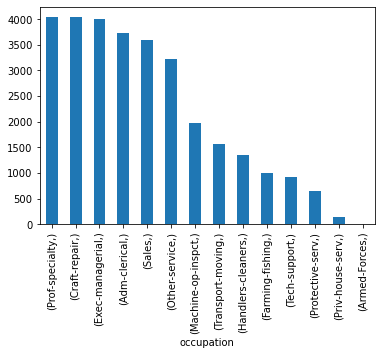

In [162]:
datasetDFSub = datasetDF[['occupation']]
datasetDFSub.value_counts().plot(kind="bar", y='number of people')

Text(0, 0.5, 'income<=50K count | income>50K count')

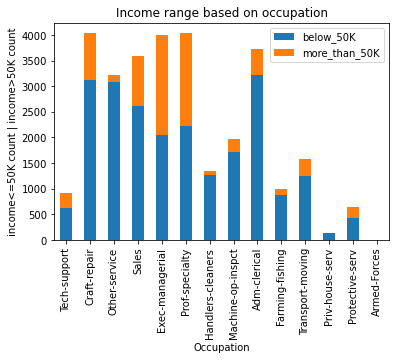

In [163]:
#Occupation
occList = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
below_50KList=[]
more_50KList=[]
for occ in occList:
    below_50KList.append((datasetDF[datasetDF['occupation']==occ]['income'].value_counts().tolist())[0])
    more_50KList.append((datasetDF[datasetDF['occupation']==occ]['income'].value_counts().tolist())[1])
        
plotdata = pd.DataFrame({
    "below_50K":below_50KList,
    "more_than_50K":more_50KList,
    }, 
    index=occList
)
plotdata.plot(kind="bar",stacked=True)
plt.title("Income range based on occupation")
plt.xlabel("Occupation")
plt.ylabel("income<=50K count | income>50K count")

Text(0, 0.5, 'income<=50K count | income>50K count')

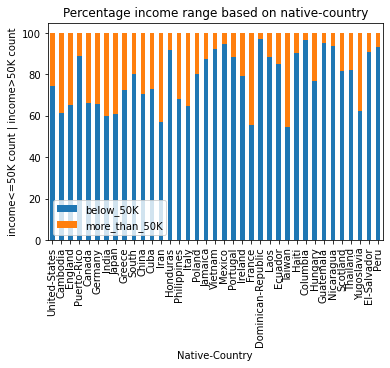

In [188]:
# Native country
ncList = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Peru']

below_50KListNC=[]
more_50KListNC=[]
for nc in ncList:
    count49k = (datasetDF[datasetDF['native-country']==nc]['income'].value_counts().tolist())[0]
    count51k = (datasetDF[datasetDF['native-country']==nc]['income'].value_counts().tolist())[1]
    below_50KListNC.append((count49k/(count49k+count51k))*100)
    more_50KListNC.append((count51k/(count49k+count51k))*100)
        
plotdata = pd.DataFrame({
    "below_50K":below_50KListNC,
    "more_than_50K":more_50KListNC,
    }, 
    index=ncList
)
plotdata.plot(kind="bar",stacked=True)
plt.title("Percentage income range based on native-country")
plt.xlabel("Native-Country")
plt.ylabel("income<=50K count | income>50K count")